<a href="https://colab.research.google.com/github/ProfRTRD/Herramientas-comp/blob/main/Tarea03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.00471229 0.00559431 0.00574538 0.00423262 0.00458851 0.00407064
 0.00379065 0.00815777 0.01007617 0.01041629 0.00522405 0.0037807
 0.01124656 0.00991774 0.00418112 0.00724501 0.01175725 0.01016816
 0.00643774 0.00427844 0.01046168 0.01351535 0.00748643 0.00556739
 0.00795863 0.00848499 0.0057173  0.0085502  0.01226998 0.00944431
 0.01805483 0.03921498 0.07393078 0.10383229 0.11513665 0.137225
 0.16248582 0.18781471 0.222009   0.24621281 0.27441666 0.29832607
 0.31557762 0.33818745 0.36203099 0.38624366 0.41431321 0.43966895
 0.46239012 0.49206101 0.51687222 0.53981546 0.56075044 0.58772912
 0.60931636 0.62560849 0.65854926 0.67542433 0.68821865 0.72823292
 0.75298727 0.74894402 0.76904532 0.80322175 0.82709936 0.84693656
 0.87076    0.89278029 0.91480672 0.94013366 0.96865291 1.00058695
 1.01800756 1.04866435 1.07195086 1.08808242 1.11402852 1.13886102
 1.15499417 1.17318562 1.18929209 1.25242866]
Pendiente (a): 0.5039999920039486
Intercepto (v_0): -0.2910666706323619


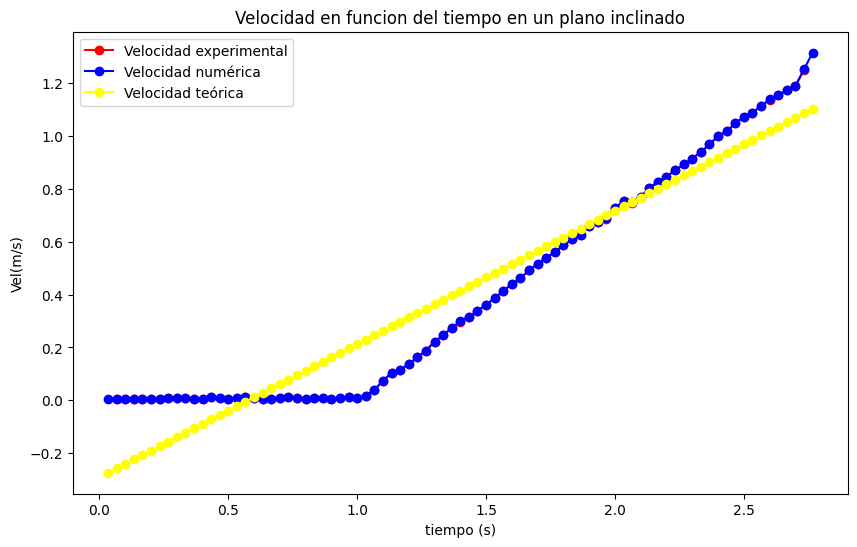

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

NEW_DATA =np.genfromtxt('datos-carro-1d.csv', delimiter = ',', skip_header = 5) #loads data into code

tcol = NEW_DATA[:,0] #selects and references first column
xcol= NEW_DATA[:,1]
ycol= NEW_DATA[:,2]
vxcol= NEW_DATA[:,3]
vycol= NEW_DATA[:,4]
axcol= NEW_DATA[:,5]
aycol= NEW_DATA[:,6]
pos= ycol + xcol
vel= vxcol + vycol
acc = axcol + aycol
dx = tcol[1] - tcol[0]
derivada = (pos[2:] - pos[:-2]) / (2 * dx)
derivada = np.insert(derivada, 0, (pos[1] - pos[0]) / dx)
velocity_derivada = np.append(derivada, (pos[-1] - pos[-2]) / dx)
print(derivada)
def funcion_lineal(o, p, i):
    return p * o + i
params, covariance = curve_fit(funcion_lineal, tcol, velocity_derivada)
n, v = params
#print(f"Pendiente (a): {n}")
#print(f"Intercepto (v_0): {v}")
velocity_prediccion = n * tcol + v

plt.figure(figsize=(10, 6))

plt.plot(tcol, vel, label='Velocidad experimental', color='red', marker='o')
plt.plot(tcol, velocity_derivada, label='Velocidad numérica', color='blue', marker='o')
plt.plot(tcol, velocity_prediccion, label='Velocidad teórica', color='yellow', marker='o')

plt.xlabel('tiempo (s)')
plt.ylabel('Vel(m/s)')
plt.title('Velocidad en funcion del tiempo en un plano inclinado')
plt.legend()
plt.show()
#function creator


<Figure size 1000x600 with 0 Axes>

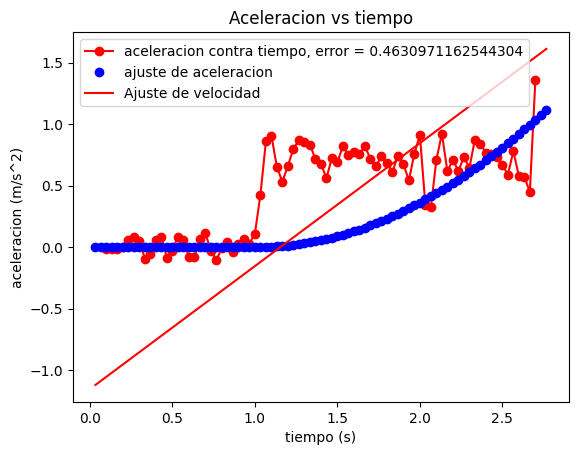

In [64]:
#ajuste no lineal sobre los datos utilizando
# x= x_0+ v_0t+(at^2/2)
def func(x, n, v, tcol):
  return x + v * tcol +((n * tcol* tcol)/2)

tdata = tcol
xdata = xcol

mean = np.nanmean(acc)
std = np.nanstd(acc)

popt, pcov = curve_fit(func, tdata, xdata)

plt.figure(figsize=(10, 6))
fig, ax =plt.subplots()
plt.plot(tdata, acc, marker = 'o', color = 'red', label = f"aceleracion contra tiempo, error = {mean}")
plt.plot(tdata, xdata, 'bo', label='ajuste de aceleracion')
plt.plot(tdata, func(tdata, *popt), 'r-', label='Ajuste de velocidad')
plt.title("Aceleracion vs tiempo")
plt.xlabel('tiempo (s)')
plt.ylabel('aceleracion (m/s^2)')
plt.legend()
plt.show()